In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



![img](https://github.com/yandexdataschool/nlp_course/raw/master/resources/banhammer.jpg)

__In this notebook__ you will build an algorithm that classifies social media comments into normal or toxic.
Like in many real-world cases, you only have a small (10^3) dataset of hand-labeled examples to work with. We'll tackle this problem using both classical nlp methods and embedding-based approach.

### Read the comments.tsv with tab separator. 
#### Choose the "should_ban" feature as the target.

In [2]:
import pandas as pd

comments=pd.read_csv('comments.tsv', sep='\t')

In [3]:
comments

,should_ban,comment_text
0,0,The picture on the article is not of the actor...
1,1,"Its madness. Shes of Chinese heritage, but JAP..."
2,1,Fuck You. Why don't you suck a turd out of my ...
3,1,God is dead\nI don't mean to startle anyone bu...
4,1,THIS USER IS A PLANT FROM BRUCE PERENS AND GRO...
...,...,...
995,0,rowspan=9 colspan=8|Did Not Qualify
996,0,"""== Disputed and under-referenced ==\n\nI have..."
997,0,Why?\nWhy does this event have its own page? 1...
998,0,"Que? \n\nWas this fat fingers? If not, can yo..."


### Split the dataset into training and test sets: 50/50
#### Do not forget to stratify the split, cause we are solving a classification problem.

In [4]:
from sklearn.model_selection import train_test_split
X=comments['comment_text']
y=comments['should_ban']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 0)

In [5]:
X_train

631    A question for EJF\n\nWhy is it you persist in...
185    Good a.m. - I did leave a note with the tea po...
732    "\n\n Unblock Request: Fuck you, unblock me! \...
404    What the hell? \nWoah.. what was this edit abo...
194    It was signed Moron - what part of that didn't...
                             ...                        
835    tiderolls... you are a shitty phage and you de...
192    User Syrthiss is a mot*herfuc*ker assh*ole ha ...
629    yes hello, i am a college student fluent in en...
559    Ed Cole\n\nFuck you and ed cole...Harry Sweoge...
684    "\n\nAlright, I am willing to concede that the...
Name: comment_text, Length: 500, dtype: object

__Note:__ it is generally a good idea to split data into train/test before anything is done to them.

It guards you against possible data leakage in the preprocessing stage. For example, should you decide to select words present in obscene tweets as features, you should only count those words over the training set. Otherwise your algoritm can cheat evaluation.

### Preprocessing and tokenizationv

Comments contain raw text with punctuation, upper/lowercase letters and even newline symbols.

To simplify all further steps, we'll split text into space-separated tokens using one of nltk tokenizers.

Do not forget to lowercase the words before tokenization, cause we want to generate case insensitive tokens.

In [6]:
from nltk.tokenize import TweetTokenizer
tt = TweetTokenizer()

def preprocess(tx):

    tx=tx.lower() 
    tx=' '.join(tt.tokenize(tx))
    return tx

text = 'How to be a grown-up at work: replace "fuck you" with "Ok, great!".'

print("before:", text)
print("after:", preprocess(text))

before: How to be a grown-up at work: replace "fuck you" with "Ok, great!".
after: how to be a grown-up at work : replace " fuck you " with " ok , great ! " .


### Preprocess each comment in train and test

In [7]:
texts_train = np.stack(list(map(preprocess, X_train)))
texts_test = np.stack(list(map(preprocess, X_test)))

In [8]:
texts_train

array(["a question for ejf why is it you persist in deleting my delete on the page about nothing . for a page to be about nothing it must have nothing on it or it is about something . now if you're going to be that much of a boring old git about it perhaps you should spend your time trying to make somebody elses world a little less fun or do you enjoy making things more boring than they could be ?",
       "good a . m . - i did leave a note with the tea pot fellow and am curious to see what happens next . however i should mention early in the process that my moves are not always linear - in chess i might be a knight - so we'll see . you are perhaps more direct , a castle perhaps ? oh yes , don't forget to sign your messages . a major wikipedia dictum .",
       '" unblock request : fuck you , unblock me ! { { unblock | hahaahahahahahahaha unblock me or i will vandalise more ! ! ! it had been six years since we had graduated from college , and for the first time since graduation , all t

In [9]:
print(texts_train[5])
print(X_train.iloc[5])


# probably the data was split differently that's why I get assertion error

" p . s . : regarding the word " " orthodox " " , a word's definition can become disconnected from its etymology , but this is not the case for " " orthodox " " . it still means " " having the right opinion / following the right practice " " . one more thing : if you call a particular class of file managers orthodox , it follows that fms based on different approaches would be unorthodox , which - of course - is bullshit . "
"
P.S.: regarding the word ""orthodox"", a word's definition can become disconnected from its etymology, but this is not the case for ""orthodox"". It still means ""having the right opinion/following the right practice"". One more thing: if you call a particular class of file managers orthodox, it follows that FMs based on different approaches would be unorthodox, which - of course - is bullshit.  "


In [10]:
assert texts_train[5] ==  'who cares anymore . they attack with impunity .'
assert texts_test[89] == 'hey todds ! quick q ? why are you so gay'
assert len(texts_test) == len(y_test)

AssertionError: 

### Solving it: bag of words

![img](http://www.novuslight.com/uploads/n/BagofWords.jpg)

One traditional approach to such problem is to use bag of words features:
1. build a vocabulary of frequent words (use train data only)
2. for each training sample, count the number of times a word occurs in it (for each word in vocabulary).
3. consider this count a feature for some classifier

__Note:__ in practice, you can compute such features using sklearn. Please don't do that in the current assignment, though.
* `from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer`

#### task: find up to k most frequent tokens in texts_train,
#### sort them by number of occurences (highest first)

In [11]:
from collections import Counter # <- use me 

k = 10000

bow_vocabulary=Counter(tt.tokenize(', '.join(texts_train)))

print('example features:', sorted(bow_vocabulary)[::100])

example features: ['!', '1903', '48', 'abuse', 'agreement', 'another', "article's", 'band', 'birth', 'bro', 'cease', 'class', 'concern', 'copy', 'daivari', 'description', 'disrupting', 'editing', 'essays', 'facto', 'findings', 'fsb', 'gland', 'hamilton', 'his', 'ibrahim', 'infomation', 'j', 'know', 'lie', 'lyle', 'member', 'month', 'nemonic', 'objected', 'over', 'personally', 'post', 'protestent', 'rare', 'related', 'revival', 'saw', 'sgt', 'skilled', 'spirituelle', 'sub', 'talking', 'thing', 'tower', 'understand', 'various', 'wearing', 'within', 'yr']


In [12]:
len(bow_vocabulary)

5476

In [13]:
def text_to_bow(text):
    """ convert text string to an array of token counts. Use bow_vocabulary. """
    
    word_ind={}
    for ind, word in enumerate(bow_vocabulary.keys()):
        word_ind[word]=ind
    
    token_counts=np.zeros(len(bow_vocabulary))
    sentense=Counter(text.split(' '))
#     print(sentense)
    for x in sentense.keys():
        if x in word_ind.keys():
            token_counts[word_ind[x]]=sentense[x]
         
        else:
            word_ind[x]=0
            token_counts[word_ind[x]]=sentense[x]
    return np.array(token_counts, 'float32')

In [14]:
text_to_bow(texts_train[0])

array([4., 1., 2., ..., 0., 0., 0.], dtype=float32)

In [16]:
word_ind['brutal']

NameError: name 'word_ind' is not defined

In [17]:
X_train_bow = np.stack(list(map(text_to_bow, texts_train)))
X_test_bow = np.stack(list(map(text_to_bow, texts_test)))

In [18]:
X_test_bow.shape

(500, 5476)

In [19]:
k_max = len(set(' '.join(texts_train).split()))
assert X_train_bow.shape == (len(texts_train), min(k, k_max))
assert X_test_bow.shape == (len(texts_test), min(k, k_max))
assert np.all(X_train_bow[5:10].sum(-1) == np.array([len(s.split()) for s in  texts_train[5:10]]))
assert len(bow_vocabulary) <= min(k, k_max)
assert X_train_bow[6, bow_vocabulary.index('.')] == texts_train[6].split().count('.')

AssertionError: 

Machine learning stuff: fit, predict, evaluate. You know the drill.

In [20]:
from sklearn.linear_model import LogisticRegression

bow_model=LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto')
bow_model.fit(X_train_bow, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

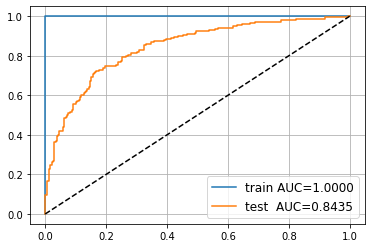

In [21]:
from sklearn.metrics import roc_auc_score, roc_curve

for name, X, y, model in [
    ('train', X_train_bow, y_train, bow_model),
    ('test ', X_test_bow, y_test, bow_model)
]:
    proba = model.predict_proba(X)[:, 1]
    auc = roc_auc_score(y, proba)
    plt.plot(*roc_curve(y, proba)[:2], label='%s AUC=%.4f' % (name, auc))

plt.plot([0, 1], [0, 1], '--', color='black',)
plt.legend(fontsize='large')
plt.grid()

### Solving it better: word vectors

Let's try another approach: instead of counting per-word frequencies, we shall map all words to pre-trained word vectors and average over them to get text features.

This should give us two key advantages: (1) we now have 10^2 features instead of 10^4 and (2) our model can generalize to word that are not in training dataset.

We begin with a standard approach with pre-trained word vectors. However, you may also try
* training embeddings from scratch on relevant (unlabeled) data
* multiplying word vectors by inverse word frequency in dataset (like tf-idf).
* concatenating several embeddings
    * call `gensim.downloader.info()['models'].keys()` to get a list of available models
* clusterizing words by their word-vectors and try bag of cluster_ids

__Note:__ loading pre-trained model may take a while. It's a perfect opportunity to refill your cup of tea/coffee and grab some extra cookies. Or binge-watch some tv series if you're slow on internet connection

In [ ]:
!pip install python-Levenshtein

In [22]:
import gensim.downloader 
embeddings = gensim.downloader.load("fasttext-wiki-news-subwords-300")

# If you're low on RAM or download speed, use "glove-wiki-gigaword-100" instead. Ignore all further asserts.

In [23]:
def vectorize_sum(comment, embedding_dim):
    """
    implement a function that converts preprocessed comment to a sum of token vectors
    """
#     embedding_dim = embeddings.wv.vectors.shape[1] # AttributeError: 'KeyedVectors' object has no attribute 'wv'
    keys = embeddings.index_to_key
    does_not_exist = np.zeros([embedding_dim], dtype='float32')
    features = sum([embeddings.get_vector(word) if word in keys else does_not_exist for word in comment.split()])
    
    return features

assert np.allclose(
    vectorize_sum(comment="who cares anymore . they attack with impunity .", embedding_dim=300)[::70],
    np.array([ 0.0108616 ,  0.0261663 ,  0.13855131, -0.18510573, -0.46380025])
)

In [24]:
extra = "'"
preprocess = lambda text: ' '.join([word.split(extra)[0] if extra in word else word for word in text.split()])
        
texts_test = np.array([preprocess(text) for text in texts_test])
texts_train = np.array([preprocess(text) for text in texts_train])

In [25]:
X_train_wv = np.stack([vectorize_sum(comment=text, embedding_dim=300) for text in texts_train])
X_test_wv = np.stack([vectorize_sum(comment=text, embedding_dim=300) for text in texts_test])

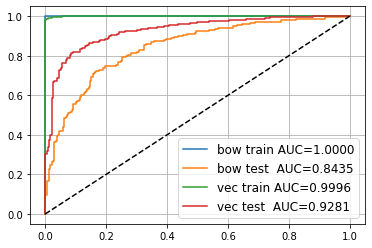

In [26]:
wv_model = LogisticRegression(max_iter=1000).fit(X_train_wv, y_train)

for name, X, y, model in [
    ('bow train', X_train_bow, y_train, bow_model),
    ('bow test ', X_test_bow, y_test, bow_model),
    ('vec train', X_train_wv, y_train, wv_model),
    ('vec test ', X_test_wv, y_test, wv_model)
]:
    proba = model.predict_proba(X)[:, 1]
    auc = roc_auc_score(y, proba)
    plt.plot(*roc_curve(y, proba)[:2], label='%s AUC=%.4f' % (name, auc))

plt.plot([0, 1], [0, 1], '--', color='black',)
plt.legend(fontsize='large')
plt.grid()

assert roc_auc_score(y_test, wv_model.predict_proba(X_test_wv)[:, 1]) > 0.92, "something's wrong with your features"

If everything went right, you've just managed to reduce misclassification rate by a factor of two.
This trick is very useful when you're dealing with small datasets. However, if you have hundreds of thousands of samples, there's a whole different range of methods for that. We'll get there in the second part.